In [7]:
import pandas as pd
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

#                               !!!INPUT FILES NEED TO BE CSV FORMAT!!!
#           As usual make sure to format any timestamps in the input files as number,
#           or else this script will read all timestamps as '#.###E+12'

#                                   Changes/input needed to run this script:
#                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#   1. file path for the csv with all timestamps, probably fracBRAIN stage download (sfg.csv).
#   2. file path for the csv with list of timestamps you want to match, i.e. field csv (field.csv)
#   3. file path for the output csv that will be the two files above, merged via vlookup (output.csv)
#   4. make sure both input files have the same header name for timestamp column. Best to use 'timestamp'
#      as the header name.
#   5. select if you want to add an epoch timestamp column to field csv - add_timestamp = "y"
#   6. select if you want to delete the unit row (extra row below headers) - delete_unit_row = "y"
#   7. select a time_offset, if needed, to shift the field csv by x amount of seconds.
#   8. (OPTIONAL) save the file you just added to timestamps to. saves to a new file, does not overwrite.

#   


# file paths for the input and output csv~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# step (1)
path = 'C:\\Users\\rivil\\Downloads'
file_name_sfg = 'Bagpipe State 22 G 86H 8.csv' 
full_path_sfg = os.path.join(path,file_name_sfg)
# step (2)
file_name_field = 'Copy of Occidental Petroleum Corporation_G 86H_Interval_8_DataListing.xlsx'
full_path_field = os.path.join(path,file_name_field)
# step (3)
file_name_sfg_output = file_name_sfg.split(".")[0]+'_out.'+file_name_sfg.split(".")[-1]
full_path_output = os.path.join(path,file_name_sfg_output)
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# create dataFrames from files ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# if one file does not have any headers for some reason, remove header=0
df_sfg = pd.read_csv(full_path_sfg, header=0, index_col=None)
df_sfg = df_sfg.iloc[:,:-2]

df_field = pd.read_excel(full_path_field,sheet_name=0,header=0,index_col=False,keep_default_na=True)
#df_field = pd.read_csv(full_path_field, header=0, index_col=None)
df_field = df_field[1:]

# transform objt into floating types
for column in df_field.columns[6:]:
    df_field[column] = df_field[column].map(lambda x: float(x))
df_field.dtypes

print(df_sfg.shape)
print(df_field.shape)

(12108, 98)
(9635, 25)


In [2]:
 # Function to subtract subsequent rows and add empty rows
def subtract_and_add_empty_rows(df, column_name):
    input_min = df_sfg.timestamp.min()
    input_max = df_sfg.timestamp.max()
    result_data = []
    counts=0

    for i in range(len(df) - 1):
        result_data.append(df.at[i, column_name])
        
        diff = int(abs(df.at[i, column_name] - df.at[i + 1, column_name])/1000)
        
        
        if(diff>1.0): 
            for j in range(abs(diff) - 1):
                counts+=1
                result_data.append(np.nan)  # Adding as many empty rows as the difference

    # Adding the last value from the original DataFrame
    result_data.append(df.at[len(df) - 1, column_name])

    temp_df = pd.DataFrame({column_name: result_data})
    temp_df.reset_index(drop=True, inplace=True)
    
   
    result_df = temp_df.merge(df, how='left', left_on='timestamp', right_on=['timestamp'])
    #result_df.fillna()
    temp_min = result_df.timestamp.min()
    temp_max = result_df.timestamp.max()    
    
    print("input data dimensions:", df.shape)
    print("timestamp input values min, max",input_min,input_max)
    print("output data dimensions:", result_df.shape)
    print("timestamp output values min, max",input_min,input_max)
    print("Added emtpy rows:", counts)
    
    return result_df



In [3]:
# Apply the function
result_df = subtract_and_add_empty_rows(df_sfg, 'timestamp')


input data dimensions: (12108, 98)
timestamp input values min, max 1706674744000 1706687006000
output data dimensions: (12263, 98)
timestamp output values min, max 1706674744000 1706687006000
Added emtpy rows: 155


In [4]:
result_df

,timestamp,Time,MRL_Const,Well_Name,Stage,P1,P2,P3,P4,P5,...,PC3_PPS_CH2_Bat,PC3_PPS_CH3_Bat,PC4_Date,PC4_Time,PC4_PPS_CH1,PC4_Perry State_51_6_1H,PC4_PPS_CH3,PC4_Perry State_51_6_1H_Bat,PC4_Perry State_51_6_1H_Bat.1,PC4_PPS_CH3_Bat
0,1.706675e+12,01/31/2024 04:19:04,1348.0,G 86H,8.0,3579.816,3345.383,4096.875,-3703.387,-3607.038,...,65535.0,65535.0,31/1/2024,04:19:04,16.709732,1798.812622,0.0,99.0,98.0,65535.0
1,1.706675e+12,01/31/2024 04:19:05,1349.0,G 86H,8.0,3579.816,3345.976,4097.471,-3703.983,-3606.444,...,65535.0,65535.0,31/1/2024,04:19:05,16.709732,1798.948853,0.0,99.0,98.0,65535.0
2,1.706675e+12,01/31/2024 04:19:06,1350.0,G 86H,8.0,3579.816,3344.791,4096.278,-3703.983,-3607.038,...,65535.0,65535.0,31/1/2024,04:19:06,16.709732,1798.775757,0.0,99.0,98.0,65535.0
3,1.706675e+12,01/31/2024 04:19:07,1351.0,G 86H,8.0,3581.006,3346.569,4094.488,-3703.983,-3605.849,...,65535.0,65535.0,31/1/2024,04:19:07,16.709732,1798.698242,0.0,99.0,98.0,65535.0
4,1.706675e+12,01/31/2024 04:19:08,1352.0,G 86H,8.0,3580.411,3347.161,4095.084,-3703.983,-3606.444,...,65535.0,65535.0,31/1/2024,04:19:08,16.709732,1798.937622,0.0,99.0,98.0,65535.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12258,1.706687e+12,01/31/2024 07:43:22,3604.0,C 15H,8.0,8695.453,3540.951,3592.221,-3705.175,-3606.444,...,65535.0,65535.0,31/1/2024,07:43:22,16.709732,1734.715332,0.0,99.0,98.0,65535.0
12259,1.706687e+12,01/31/2024 07:43:23,3605.0,C 15H,8.0,8732.941,3541.543,3592.221,-3705.175,-3606.444,...,65535.0,65535.0,31/1/2024,07:43:23,16.709732,1734.705200,0.0,99.0,98.0,65535.0
12260,1.706687e+12,01/31/2024 07:43:24,3606.0,C 15H,8.0,8698.429,3540.358,3591.028,-3705.175,-3606.444,...,65535.0,65535.0,31/1/2024,07:43:24,16.709732,1734.729614,0.0,99.0,98.0,65535.0
12261,1.706687e+12,01/31/2024 07:43:25,3607.0,C 15H,8.0,8700.809,3540.951,3592.818,-3705.175,-3606.444,...,65535.0,65535.0,31/1/2024,07:43:25,16.709732,1734.547241,0.0,99.0,98.0,65535.0


In [5]:
result_df[result_df.isna().all(axis=1)]

,timestamp,Time,MRL_Const,Well_Name,Stage,P1,P2,P3,P4,P5,...,PC3_PPS_CH2_Bat,PC3_PPS_CH3_Bat,PC4_Date,PC4_Time,PC4_PPS_CH1,PC4_Perry State_51_6_1H,PC4_PPS_CH3,PC4_Perry State_51_6_1H_Bat,PC4_Perry State_51_6_1H_Bat.1,PC4_PPS_CH3_Bat
2594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


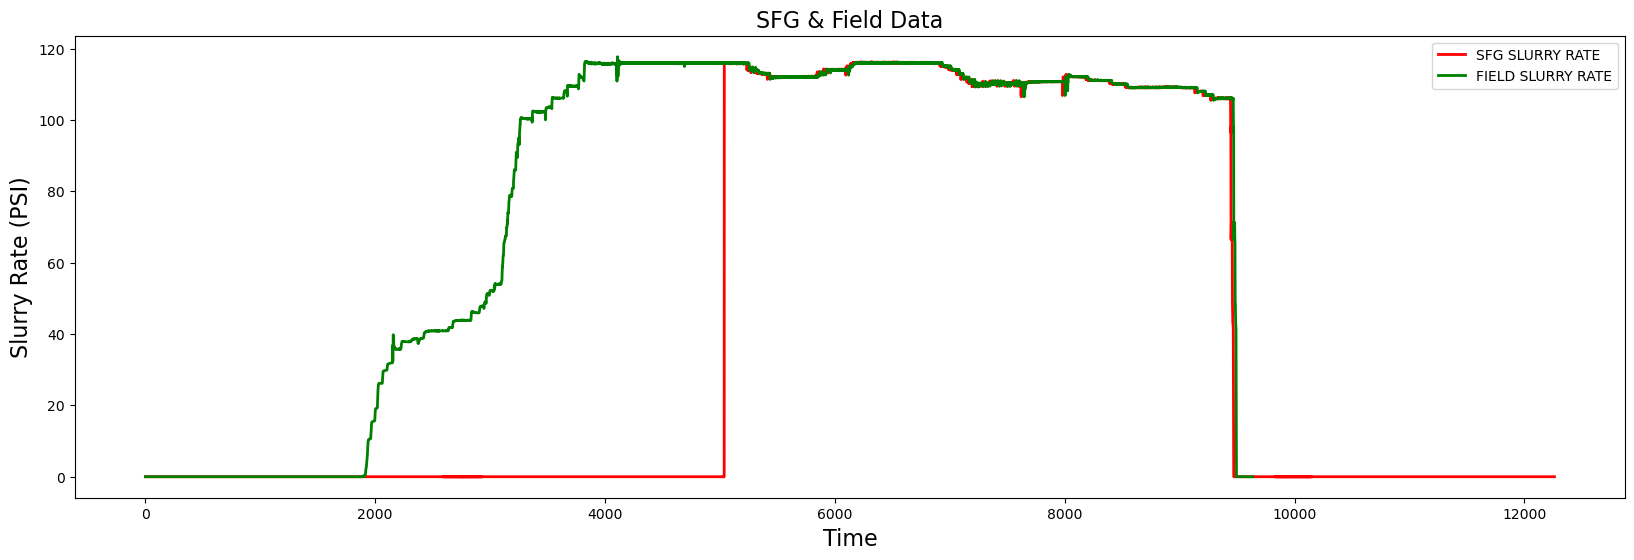

In [8]:
# Plotting Close Value Data
plt.figure(figsize=(20,6))
plt.ticklabel_format(useOffset=False, style='plain')
plt.plot(result_df.index.values, result_df['Slurry Rate'].values, lw=2, color='red',label="SFG SLURRY RATE")
plt.plot(df_field.index.values, df_field['SlurryRate'].values, lw=2, color='green',label="FIELD SLURRY RATE")
plt.xlabel("Time", fontsize=16)
plt.ylabel("Slurry Rate (PSI)", fontsize=16)
plt.title("SFG & Field Data", fontsize=16);
plt.legend()

plt.show()


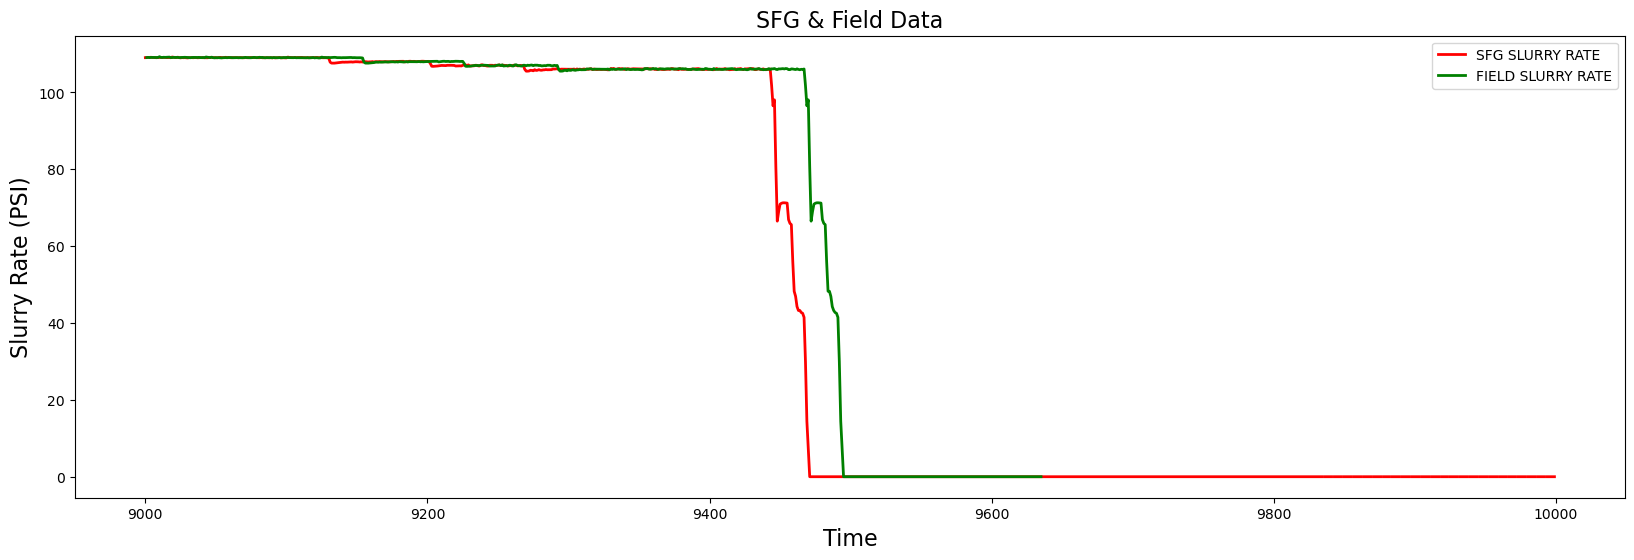

In [10]:
# Plotting Close Value Data
start_date = 9000
end_date = 10000
plt.figure(figsize=(20,6))
plt.ticklabel_format(useOffset=False, style='plain')
plt.plot(result_df[start_date:end_date].index.values, result_df['Slurry Rate'][start_date:end_date].values, lw=2, color='red',label="SFG SLURRY RATE")
plt.plot(df_field[start_date:end_date].index.values, df_field['SlurryRate'][start_date:end_date].values, lw=2, color='green',label="FIELD SLURRY RATE")
plt.xlabel("Time", fontsize=16)
plt.ylabel("Slurry Rate (PSI)", fontsize=16)
plt.title("SFG & Field Data", fontsize=16);
plt.legend()

plt.show()

In [11]:
# convertion to series
result_df_s = pd.Series(result_df['Slurry Rate'][start_date:end_date].interpolate().values)
print(type(result_df_s))
print(np.count_nonzero(np.isnan(result_df_s)))


df_field_s = pd.Series(df_field['SlurryRate'][start_date:end_date].interpolate().values)
print(type(df_field_s))
df_field_s
print(np.count_nonzero(np.isnan(df_field_s)))


<class 'pandas.core.series.Series'>
0
<class 'pandas.core.series.Series'>
0


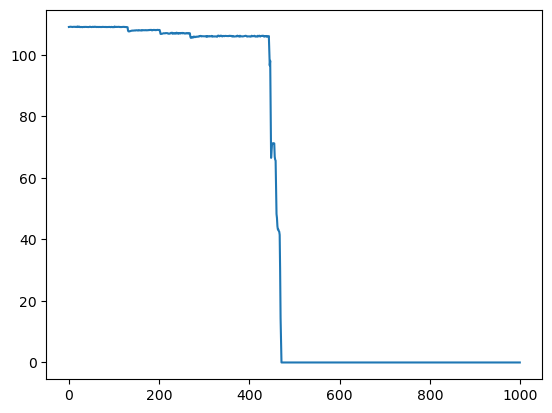

In [12]:
plt.plot(result_df_s)

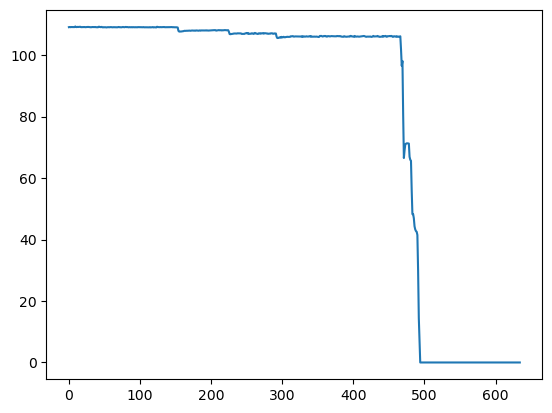

In [13]:
plt.plot(df_field_s)

In [14]:
def pad_series(series1, series2):
    """
    Pad the shorter series with zeros to make them of equal length.
    
    Args:
    - series1: First pandas Series.
    - series2: Second pandas Series.
    
    Returns:
    - Tuple of padded series1 and series2.
    """
    len1 = len(series1)
    len2 = len(series2)
    
    if len1 < len2:
        series1 = pd.concat([series1, pd.Series([0] * (len2 - len1))], ignore_index=True)
    elif len2 < len1:
        series2 = pd.concat([series2, pd.Series([0] * (len1 - len2))], ignore_index=True)
    
    return series1, series2

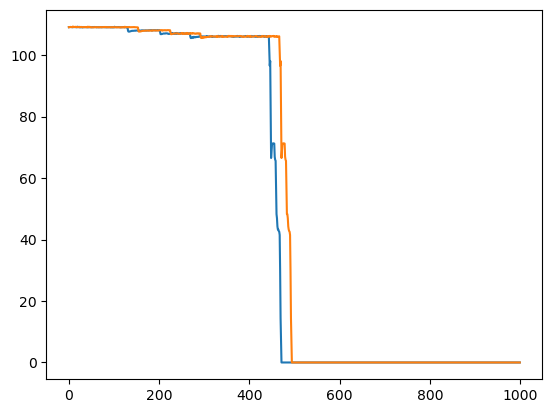

In [15]:
#series1 = result_df_s
#series2 = df_field_s
padded_result_df_s, padded_df_field_s = pad_series(result_df_s, df_field_s)
plt.plot(padded_result_df_s)
plt.plot(padded_df_field_s)

In [16]:
print('**** BEFORE PADDING  ****')
print(len(result_df_s), len(df_field_s))
print('**** BEFORE PADDING  ****')
print(len(padded_result_df_s), len(padded_df_field_s))

**** BEFORE PADDING  ****
1000 635
**** BEFORE PADDING  ****
1000 1000


In [17]:
full_path_output_s1 = os.path.join('C:\\Users\\rivil\\Downloads','result_df_s_output')  # ** Outputs into the same Input Path
result_df['Slurry Rate'][start_date:end_date].interpolate().to_csv(full_path_output_s1, index=False, mode='w+')

full_path_output_s2 = os.path.join('C:\\Users\\rivil\\Downloads','df_field_s_output')  # ** Outputs into the same Input Path
df_field['SlurryRate'][start_date:end_date].interpolate().to_csv(full_path_output_s2, index=False, mode='w+')




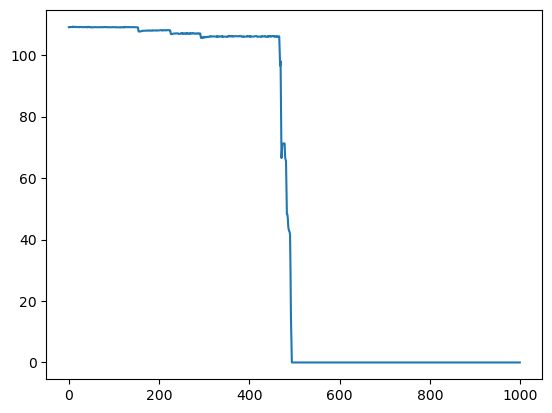

In [18]:
plt.plot(padded_df_field_s)

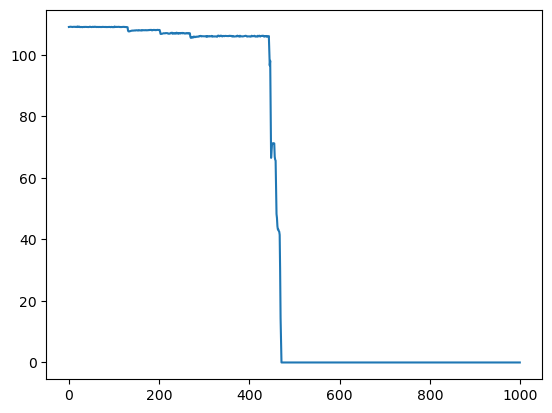

In [19]:
plt.plot(padded_result_df_s)


In [21]:
# cross correlation

from scipy import signal

def ccf_values(series1, series2):
    p = series1
    q = series2
    p = (p - np.mean(p)) / (np.std(p) * len(p))
    q = (q - np.mean(q)) / (np.std(q))  
    c = np.correlate(p, q, 'full')
    return c

#ccf_ielts = ccf_values(result_df_s, df_field_s)
ccf_ielts = ccf_values(padded_result_df_s,padded_df_field_s)
ccf_ielts

array([-0.00110155, -0.00220349, -0.00330621, ..., -0.00301339,
       -0.00200933, -0.00100423])

In [22]:
# list of of our lag values
lags = signal.correlation_lags(len(padded_result_df_s),len(padded_df_field_s))
lags

array([-999, -998, -997, ...,  997,  998,  999])

In [23]:
len(lags),len(ccf_ielts)

(1999, 1999)

In [24]:
np.argmax(ccf_ielts)- (len(padded_result_df_s) - 1)

-11

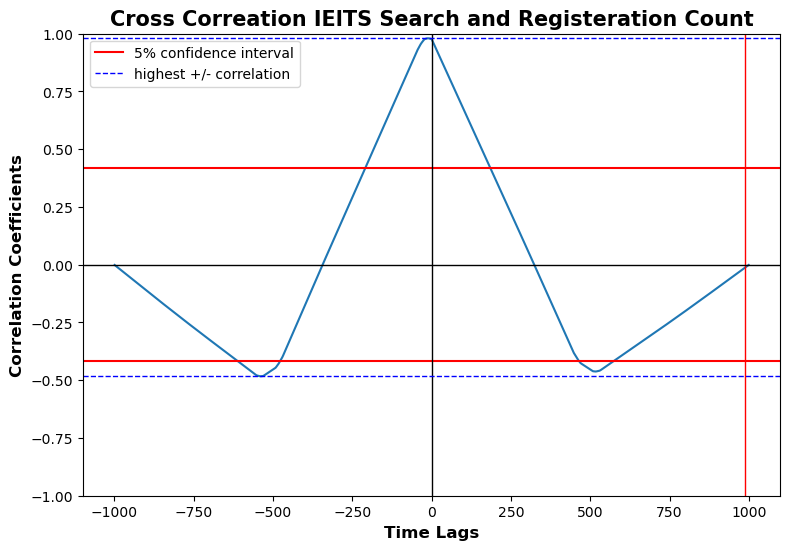

In [25]:
def ccf_plot(lags, ccf):
    fig, ax =plt.subplots(figsize=(9, 6))
    ax.plot(lags, ccf)
    ax.axhline(-2/np.sqrt(23), color='red', label='5% confidence interval')
    ax.axhline(2/np.sqrt(23), color='red')
    ax.axvline(x = np.argmax(ccf_ielts), color = 'red', lw = 1)
    ax.axvline(x = 0, color = 'black', lw = 1)
    ax.axhline(y = 0, color = 'black', lw = 1)
    ax.axhline(y = np.max(ccf), color = 'blue', lw = 1, linestyle='--', label = 'highest +/- correlation')
    ax.axhline(y = np.min(ccf), color = 'blue', lw = 1, linestyle='--')
    ax.set(ylim = [-1, 1])
    ax.set_title('Cross Correation IElTS Search and Registeration Count', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold', fontsize = 12)
    ax.set_xlabel('Time Lags', weight='bold', fontsize = 12)
    plt.legend()
    
#ccf_plot(lags[1620:1670], ccf_ielts[1620:1670])
ccf_plot(lags, ccf_ielts)

0.980296295295933 0.3740032431167903
988


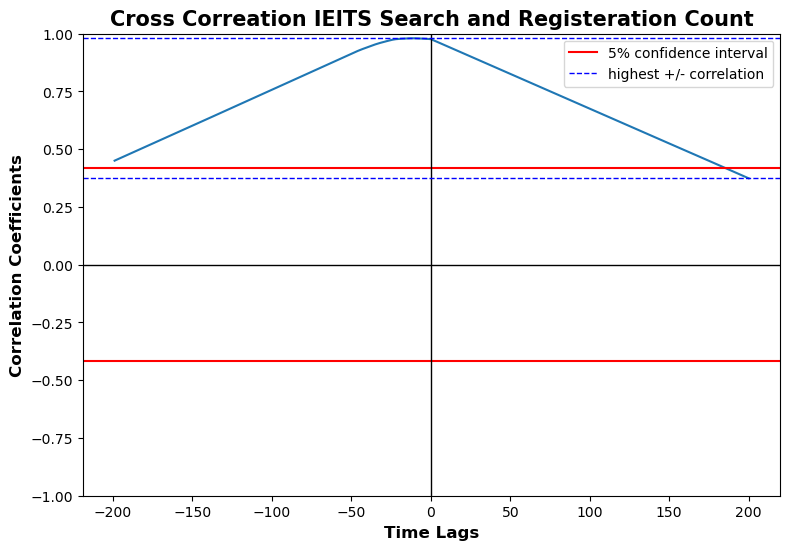

In [26]:
def ccf_plot(lags, ccf):
    fig, ax =plt.subplots(figsize=(9, 6))
    ax.plot(lags, ccf)
    ax.axhline(-2/np.sqrt(23), color='red', label='5% confidence interval')
    ax.axhline(2/np.sqrt(23), color='red')
    ax.axvline(x = 0, color = 'black', lw = 1)
    ax.axhline(y = 0, color = 'black', lw = 1)
    print(max(ccf),min(ccf))
    ax.axhline(y = np.max(ccf), color = 'blue', lw = 1, linestyle='--', label = 'highest +/- correlation')
    ax.axhline(y = np.min(ccf), color = 'blue', lw = 1, linestyle='--')
    ax.set(ylim = [-1, 1])
    ax.set_title('Cross Correation IElTS Search and Registeration Count', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold', fontsize = 12)
    ax.set_xlabel('Time Lags', weight='bold', fontsize = 12)
    plt.legend()
    
ccf_plot(lags[800:1200], ccf_ielts[800:1200])
print(np.argmax(ccf_ielts))

In [28]:
type(padded_result_df_s), type(padded_df_field_s)

(pandas.core.series.Series, pandas.core.series.Series)

1000 1000


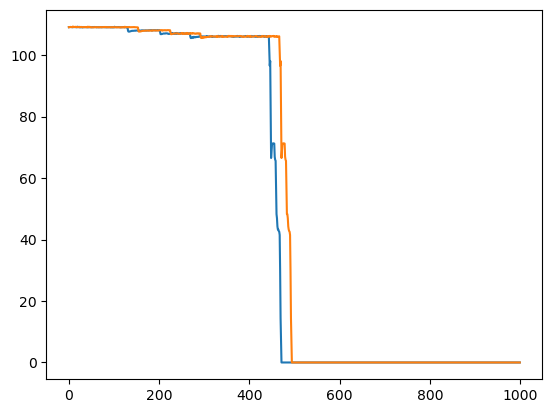

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
#data = {'Series1': [105, 100, 100, 105, 80, 60, 40, 20, 20 , 25, 25, 30, 30, 35, 35],
#        'Series2': [90, 90, 90, 105, 100, 100, 105, 80, 60, 40, 20, 20 , 25, 25, 30]}

df_series1 = pd.DataFrame(padded_result_df_s)
df_series2 = pd.DataFrame(padded_df_field_s)
plt.plot(df_series1)
plt.plot(df_series2)
print(len(df_series1),len(df_series1))

max correlation is at lag -11


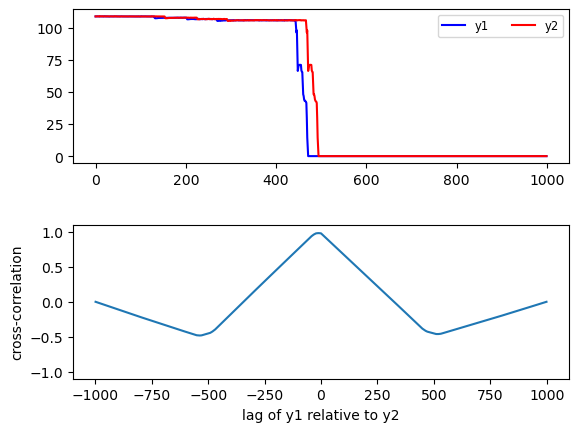

In [34]:

npts = df_series1.size

lags = np.arange(-npts + 1, npts)
ccov = np.correlate(df_series1.values.flatten() - df_series1.values.flatten().mean(), df_series2.values.flatten() - df_series2.values.flatten().mean(), mode='full')
ccor = ccov / (npts * df_series1.values.flatten().std() * df_series2.values.flatten().std())

fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=0.4)
ax = axs[0]
ax.plot(df_series1.index.values, df_series1.values.flatten(), 'b', label='y1')
ax.plot(df_series2.index.values, df_series2.values.flatten(), 'r', label='y2')
ax.legend(loc='upper right', fontsize='small', ncol=2)

ax = axs[1]
ax.plot(lags, ccor)
ax.set_ylim(-1.1, 1.1)
ax.set_ylabel('cross-correlation')
ax.set_xlabel('lag of y1 relative to y2')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)

max correlation is at lag -2


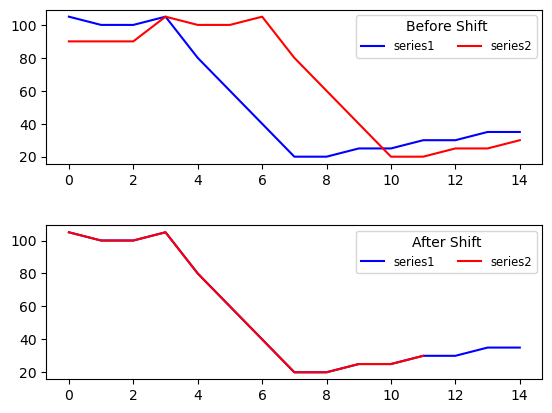

In [68]:
import pandas as pd
from scipy import signal


def synchronize_series(series1, series2,lag):
    """
    Synchronize two series using cross-correlation.
    
    Args:
    - series1: First pandas Series.
    - series2: Second pandas Series.
    
    Returns:
    - Synchronized series1 and series2.
    """

    
    # Shift one of the series by lag/lead value
    if lag< 0:
        series2_sync = series2.shift(lag-1)
        series1_sync = series1
    else:
        series1_sync = series1.shift(-lag)
        series2_sync = series2
    
    return series1_sync, series2_sync


# Synchronize Series1 and Series2
lag = lags[np.argmax(ccor)]
sync_series1, sync_series2 = synchronize_series(df_series1, df_series2, lag)

fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=0.4)
ax = axs[0]
ax.plot(df_series1.index, df_series1, 'b', label='series1')
ax.plot(df_series2.index, df_series2, 'r', label='series2')
ax.legend(title="Before Shift", loc='upper right', fontsize='small', ncol=2)

ax = axs[1]
ax.plot(sync_series1.index, sync_series1, 'b', label='series1')
ax.plot(sync_series2.index, sync_series2, 'r', label='series2')
ax.legend(title="After Shift", loc='upper right', fontsize='small', ncol=2)


maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)

# Print synchronized series
#print("Synchronized Series 1:", sync_series1)
#print("Synchronized Series 2:", sync_series2)

max correlation is at lag -2


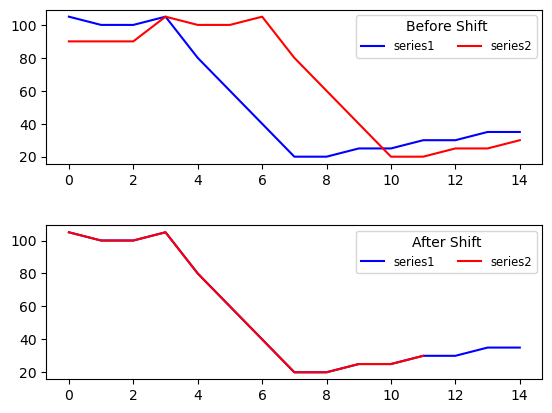

In [68]:
import pandas as pd
from scipy import signal


def synchronize_series(series1, series2,lag):
    """
    Synchronize two series using cross-correlation.
    
    Args:
    - series1: First pandas Series.
    - series2: Second pandas Series.
    
    Returns:
    - Synchronized series1 and series2.
    """

    
    # Shift one of the series by lag/lead value
    if lag< 0:
        series2_sync = series2.shift(lag-1)
        series1_sync = series1
    else:
        series1_sync = series1.shift(-lag)
        series2_sync = series2
    
    return series1_sync, series2_sync


# Synchronize Series1 and Series2
lag = lags[np.argmax(ccor)]
sync_series1, sync_series2 = synchronize_series(df_series1, df_series2, lag)

fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=0.4)
ax = axs[0]
ax.plot(df_series1.index, df_series1, 'b', label='series1')
ax.plot(df_series2.index, df_series2, 'r', label='series2')
ax.legend(title="Before Shift", loc='upper right', fontsize='small', ncol=2)

ax = axs[1]
ax.plot(sync_series1.index, sync_series1, 'b', label='series1')
ax.plot(sync_series2.index, sync_series2, 'r', label='series2')
ax.legend(title="After Shift", loc='upper right', fontsize='small', ncol=2)


maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)

# Print synchronized series
#print("Synchronized Series 1:", sync_series1)
#print("Synchronized Series 2:", sync_series2)

[0. 0. 0. ... 0. 0. 0.]
999 999
Lag/lead between Series1 and Series2: 0


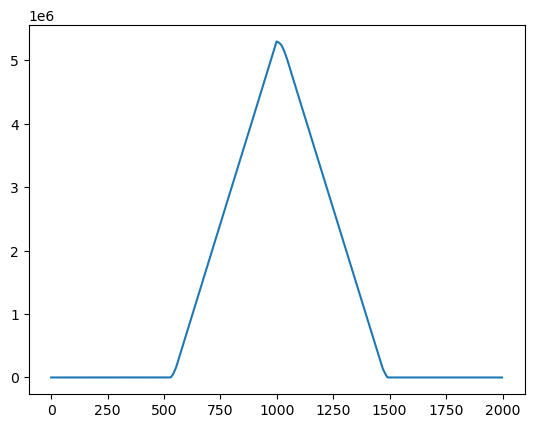

In [424]:
cross_corr = signal.correlate(padded_df_field_s,padded_result_df_s,mode='full')
print(cross_corr)
plt.plot(cross_corr)
print(np.argmax(cross_corr),cross_corr.argmax())
# Find lagging/leading value
lag_lead = cross_corr.argmax() - (len(padded_df_field_s) - 1)
print("Lag/lead between Series1 and Series2:", lag_lead)


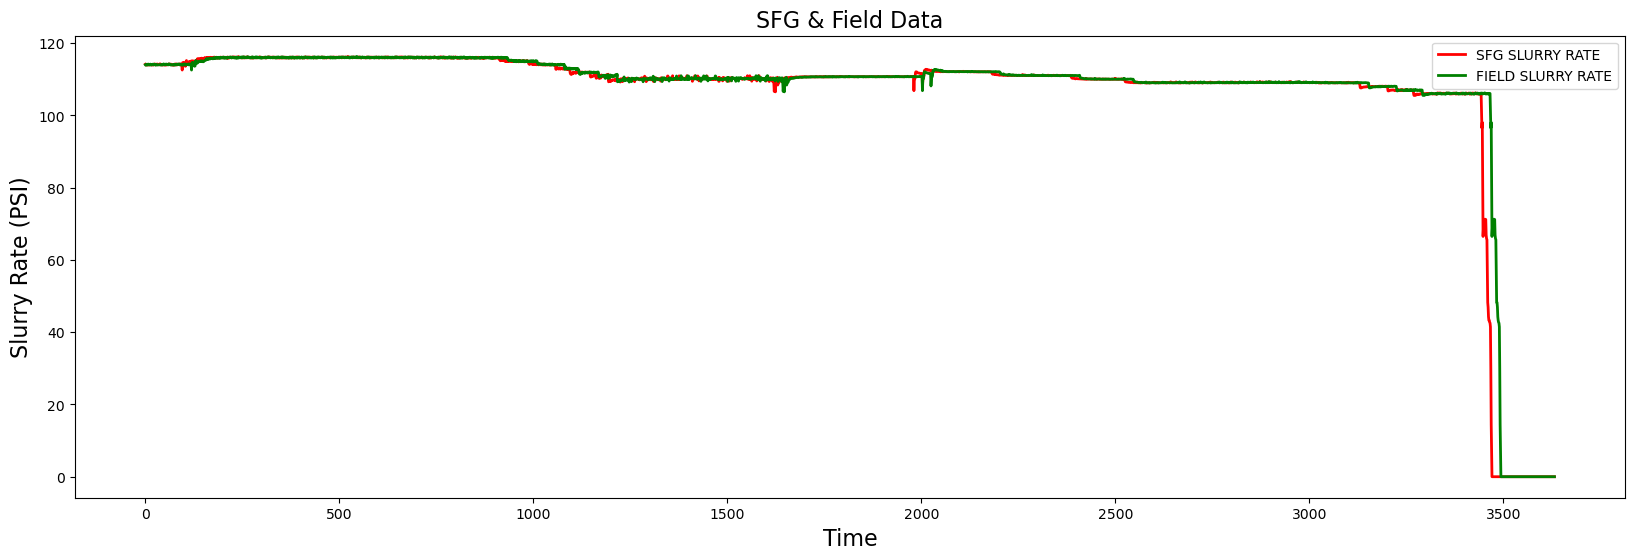

In [387]:
# Plotting Close Value Data
plt.figure(figsize=(20,6))
plt.ticklabel_format(useOffset=False, style='plain')
plt.plot(result_df_s.index, result_df_s, lw=2, color='red',label="SFG SLURRY RATE")
plt.plot(df_field_s.index, df_field_s, lw=2, color='green',label="FIELD SLURRY RATE")
plt.xlabel("Time", fontsize=16)
plt.ylabel("Slurry Rate (PSI)", fontsize=16)
plt.title("SFG & Field Data", fontsize=16);
plt.legend()

plt.show()

In [368]:
print(len(result_df_s),len(df_field_s))

3633 3633


In [426]:
import pandas as pd
from scipy import signal

# Sample data
data = {'Series1': [10, 20, 30, 15, 25,35 ,70 ,80],
        'Series2': [15, 25, 35, 0, 0,0,0,0]}

# Create DataFrame
df = pd.DataFrame(data)

# Compute cross-correlation
cross_corr = signal.correlate(df['Series1'], df['Series2'], mode='full')

# Find lagging/leading value
lag_lead = cross_corr.argmax() - (len(df['Series1']) - 1)

print("Lag/lead between Series1 and Series2:", lag_lead)

Lag/lead between Series1 and Series2: 5


In [478]:
import pandas as pd
import numpy as np
from scipy import signal

def pad_series(series1, series2):
    """
    Pad the shorter series with zeros to make them of equal length.
    
    Args:
    - series1: First pandas Series.
    - series2: Second pandas Series.
    
    Returns:
    - Tuple of padded series1 and series2.
    """
    len1 = len(series1)
    len2 = len(series2)
    
    if len1 < len2:
        series1 = pd.concat([series1, pd.Series([0] * (len2 - len1))], ignore_index=True)
    elif len2 < len1:
        series2 = pd.concat([series2, pd.Series([0] * (len1 - len2))], ignore_index=True)
    
    return series1, series2

# Sample data
data = {'Series1': [10, 20, 30, 0,5,15,25,35,40, 50],
        'Series2': [15, 25, 35,40]}

df_series1 = pd.DataFrame(data['Series1'])
df_series2 = pd.DataFrame(data['Series2'])

# Create DataFrame
df = pd.concat([df_series1,df_series2], ignore_index=True, axis=1)
#df = pd.DataFrame(data)

print(df)

# Pad the shorter series with zeros to match lengths
df['Series1_pad'], df['Series2_pad'] = pad_series(df_series1, df_series2)

print(df)

# Compute cross-correlation
cross_corr = signal.correlate(df['Series1_pad'], df['Series2_pad'], mode='full')
lags = signal.correlation_lags(len(df['Series1_pad']),len(df['Series2_pad']), mode="full")
lag = lags[np.argmax(cross_corr)]
print(f"Best lag: {lag}")

# Find lagging/leading value
lag_lead = cross_corr.argmax() - (len(df['Series1_pad'])-1)

print("Lag/lead between Series1 and Series2:", lag_lead)


    0     1
0  10  15.0
1  20  25.0
2  30  35.0
3   0  40.0
4   5   NaN
5  15   NaN
6  25   NaN
7  35   NaN
8  40   NaN
9  50   NaN
    0     1  Series1_pad  Series2_pad
0  10  15.0           10           15
1  20  25.0           20           25
2  30  35.0           30           35
3   0  40.0            0           40
4   5   NaN            5            0
5  15   NaN           15            0
6  25   NaN           25            0
7  35   NaN           35            0
8  40   NaN           40            0
9  50   NaN           50            0
Best lag: 6
Lag/lead between Series1 and Series2: 6


In [470]:
from scipy import signal

def ccf_values(series1, series2):
    p = series1
    q = series2
    p = (p - np.mean(p)) / (np.std(p) * len(p))
    q = (q - np.mean(q)) / (np.std(q))  
    c = np.correlate(p, q, 'full')
    return c

#ccf_ielts = ccf_values(result_df_s, df_field_s)
ccf_ielts = ccf_values(df.Series1_pad,df.Series2_pad)
ccf_ielts

array([ 0.06413135,  0.07893089,  0.04439863,  0.15786179,  0.24665904,
        0.28612449,  0.05319256, -0.02959908,  0.06885005, -0.40537877,
       -0.66254763, -0.68807148, -0.47122601, -0.12354401,  0.19518237,
        0.57396486,  0.38864885,  0.18188423,  0.04053788])

In [471]:
# list of of our lag values
lags = signal.correlation_lags(len(df.Series1_pad),len(df.Series2_pad))
lags

array([-9, -8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9])

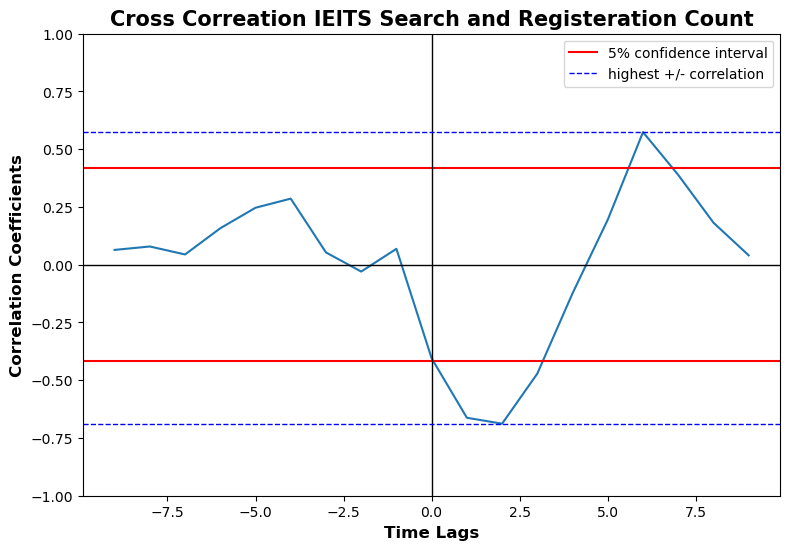

In [472]:
def ccf_plot(lags, ccf):
    fig, ax =plt.subplots(figsize=(9, 6))
    ax.plot(lags, ccf)
    ax.axhline(-2/np.sqrt(23), color='red', label='5% confidence interval')
    ax.axhline(2/np.sqrt(23), color='red')
    ax.axvline(x = 0, color = 'black', lw = 1)
    ax.axhline(y = 0, color = 'black', lw = 1)
    ax.axhline(y = np.max(ccf), color = 'blue', lw = 1, linestyle='--', label = 'highest +/- correlation')
    ax.axhline(y = np.min(ccf), color = 'blue', lw = 1, linestyle='--')
    ax.set(ylim = [-1, 1])
    ax.set_title('Cross Correation IElTS Search and Registeration Count', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold', fontsize = 12)
    ax.set_xlabel('Time Lags', weight='bold', fontsize = 12)
    plt.legend()
    
#ccf_plot(lags[1620:1670], ccf_ielts[1620:1670])
ccf_plot(lags, ccf_ielts)

In [473]:
print(np.argmax(lags)- (len(df_series2)))

14


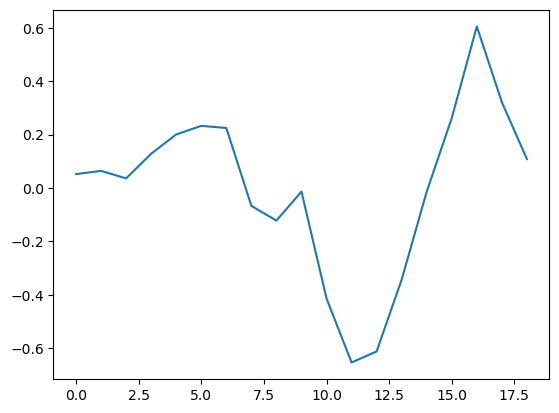

In [467]:
plt.plot(ccf_ielts)

In [468]:
np.argmax(lags)

18

In [497]:
import pandas as pd
from scipy import signal

def pad_series(series1, series2):
    """
    Pad the shorter series with zeros to make them of equal length.
    
    Args:
    - series1: First pandas Series.
    - series2: Second pandas Series.
    
    Returns:
    - Tuple of padded series1 and series2.
    """
    len1 = len(series1)
    len2 = len(series2)
    
    if len1 < len2:
        series1 = pd.concat([series1, pd.Series([0] * (len2 - len1))], ignore_index=True)
    elif len2 < len1:
        series2 = pd.concat([series2, pd.Series([0] * (len1 - len2))], ignore_index=True)
    
    return series1, series2


def synchronize_series(series1, series2):
    """
    Synchronize two series using cross-correlation.
    
    Args:
    - series1: First pandas Series.
    - series2: Second pandas Series.
    
    Returns:
    - Synchronized series1 and series2.
    """
    # Compute cross-correlation
    cross_corr = signal.correlate(series1, series2, mode='full')
    print(cross_corr)
    print(cross_corr.argmax())
    
    # Find lag/lead value
    lag_lead = cross_corr.argmax() - (len(series1)-1)
    print('lag_lead:', lag_lead, 'cross_corr.argmax():', cross_corr.argmax(), 'len(series1):',len(series1))
    
    # Shift one of the series by lag/lead value
    if lag_lead >= 0:
        series2_sync = series2.shift(-lag_lead)
        series1_sync = series1
    else:
        series1_sync = series1.shift(lag_lead)
        series2_sync = series2
    
    return series1_sync, series2_sync

# Sample data
data = {'Series1': [10, 20, -10, 0, 15, 25, 35, 45, 10, 0, 20],
        'Series2': [20, 5, 15, 25, 35, 45, 50, 60]}

df_series1 = pd.DataFrame(data['Series1'])
df_series2 = pd.DataFrame(data['Series2'])

# Create DataFrame
df = pd.concat([df_series1,df_series2], ignore_index=True, axis=1)

# Pad the shorter series with zeros to match lengths
df['Series1_pad'], df['Series2_pad'] = pad_series(df_series1, df_series2)
print(df)

# Synchronize Series1 and Series2
sync_series1, sync_series2 = synchronize_series(df['Series1_pad'], df['Series2_pad'])

# Print synchronized series
print("Synchronized Series 1:", sync_series1)
print("Synchronized Series 2:", sync_series2)

     0     1  Series1_pad  Series2_pad
0   10  20.0           10           20
1   20   5.0           20            5
2  -10  15.0          -10           15
3    0  25.0            0           25
4   15  35.0           15           35
5   25  45.0           25           45
6   35  50.0           35           50
7   45  60.0           45           60
8   10   NaN           10            0
9    0   NaN            0            0
10  20   NaN           20            0
[   0    0    0  600 1700  850  750 1400 2550 4125 6250 6025 4400 4550
 3425 2500 1775 1450  500  100  400]
10
lag_lead: 0 cross_corr.argmax(): 10 len(series1): 11
Synchronized Series 1: 0     10
1     20
2    -10
3      0
4     15
5     25
6     35
7     45
8     10
9      0
10    20
Name: Series1_pad, dtype: int64
Synchronized Series 2: 0     20
1      5
2     15
3     25
4     35
5     45
6     50
7     60
8      0
9      0
10     0
Name: Series2_pad, dtype: int64


In [522]:
import pandas as pd
from scipy import signal


def synchronize_series(series1, series2):
    """
    Pad the shorter series with zeros to make them of equal length.
    Args:
    - series1: First pandas Series.
    - series2: Second pandas Series.
    """
    
    len1 = len(series1)
    len2 = len(series2)
    if len1 < len2:
        series1 = pd.concat([series1, pd.Series([0] * (len2 - len1))], ignore_index=True)
    elif len2 < len1:
        series2 = pd.concat([series2, pd.Series([0] * (len1 - len2))], ignore_index=True) 

    """
    Synchronize two series using cross-correlation.
    Args:
    - series1: First pandas Series.
    - series2: Second pandas Series.
    
    Returns:
    - Synchronized series1 and series2.
    """
    
    # Compute cross-correlation
    cross_corr = signal.correlate(series1, series2, mode='full')
    #print(cross_corr)
    #print(cross_corr.argmax())
    
    # Find lag/lead value
    lags = signal.correlation_lags(len(series1),len(series2), mode="full")
    lag = lags[np.argmax(cross_corr)]
    #print(f"Best lag: {lag}")
    
    lag_lead = cross_corr.argmax() - (len2+1)
    print('lag_lead:', lag_lead, 'cross_corr.argmax():', cross_corr.argmax(), 'len(series1):',len2)
    
    # Shift one of the series by lag/lead value
    if lag < 0:
        series2_sync = series2.shift(lag)
        series1_sync = series1
        #y = y.iloc[abs(lag):].reset_index(drop=True)
    else:
        series1_sync = series1.shift(lag)
        series2_sync = series2
        #x = x.iloc[lag:].reset_index(drop=True)
    return series1_sync, series2_sync



    # if lag_lead >= 0:
    #     series2_sync = series2.shift(lag_lead)
    #     series1_sync = series1
    # else:
    #     series1_sync = series1.shift(-lag_lead+1)
    #     series2_sync = series2
    
    return series1_sync, series2_sync


# Sample data
data = {'Series1': [10, 20, -10, 0, 0, 0, 0, 0, 0 , 15, 25, 35, 45, 10, 0, 20],
        'Series2': [0, 0, 15, 25, 35, 45, 50, 60]}

df_series1 = pd.DataFrame(data['Series1'])
df_series2 = pd.DataFrame(data['Series2'])

# Create DataFrame
df = pd.concat([df_series1,df_series2], ignore_index=True, axis=1)

# Pad the shorter series with zeros to match lengths
#df['Series1_pad'], df['Series2_pad'] = pad_series(df_series1, df_series2)
print(df)

# Synchronize Series1 and Series2
df['sync_series1'], df['sync_series2']  = synchronize_series(df_series1, df_series2)
print(df)
# Print synchronized series
#print("Synchronized Series 1:", sync_series1)
#print("Synchronized Series 2:", sync_series2)

     0     1
0   10   0.0
1   20   0.0
2  -10  15.0
3    0  25.0
4    0  35.0
5    0  45.0
6    0  50.0
7    0  60.0
8    0   NaN
9   15   NaN
10  25   NaN
11  35   NaN
12  45   NaN
13  10   NaN
14   0   NaN
15  20   NaN
lag_lead: 11 cross_corr.argmax(): 20 len(series1): 8
     0     1  sync_series1  sync_series2
0   10   0.0           NaN             0
1   20   0.0           NaN             0
2  -10  15.0           NaN            15
3    0  25.0           NaN            25
4    0  35.0           NaN            35
5    0  45.0          10.0            45
6    0  50.0          20.0            50
7    0  60.0         -10.0            60
8    0   NaN           0.0             0
9   15   NaN           0.0             0
10  25   NaN           0.0             0
11  35   NaN           0.0             0
12  45   NaN           0.0             0
13  10   NaN           0.0             0
14   0   NaN          15.0             0
15  20   NaN          25.0             0


     0     1
0   10   0.0
1   20   0.0
2  -10  15.0
3    0  25.0
4    0  35.0
5    0  45.0
6    0  50.0
7    0  60.0
8    0   NaN
9   15   NaN
10  25   NaN
11  35   NaN
12  45   NaN
13  10   NaN
14   0   NaN
15  20   NaN


ValueError: object too deep for desired array

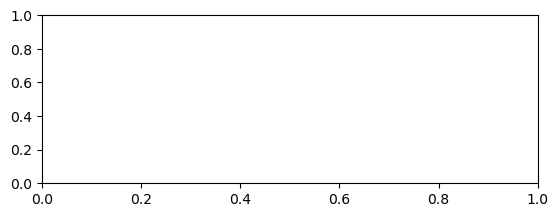

In [532]:
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt


def synchronize_series(series1, series2):
    """
    Pad the shorter series with zeros to make them of equal length.
    Args:
    - series1: First pandas Series.
    - series2: Second pandas Series.
    """
    
    len1 = len(series1)
    len2 = len(series2)
    if len1 < len2:
        series1 = pd.concat([series1, pd.Series([0] * (len2 - len1))], ignore_index=True)
    elif len2 < len1:
        series2 = pd.concat([series2, pd.Series([0] * (len1 - len2))], ignore_index=True) 

    """
    Synchronize two series using cross-correlation.
    Args:
    - series1: First pandas Series.
    - series2: Second pandas Series.
    
    Returns:
    - Synchronized series1 and series2.
    """
    
    # Compute cross-correlation
    #ross_corr = signal.correlate(series1, series2, mode='full')
    #axis_x = np.arange(1,cross_corr.size+1)
    #plt.plot(axis_x,cross_corr,'ro-')
    
    # Plot graph
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
 
    # cross correlation using xcorr()
    # function
    ax1.xcorr(series1, series2, usevlines=True, maxlags=50, normed=True, lw=2)
    
    plt.show()
    
    return 
    
    
    
    
    
    
# Sample data
data = {'Series1': [10, 20, -10, 0, 0, 0, 0, 0, 0 , 15, 25, 35, 45, 10, 0, 20],
        'Series2': [0, 0, 15, 25, 35, 45, 50, 60]}

df_series1 = pd.DataFrame(data['Series1'])
df_series2 = pd.DataFrame(data['Series2'])



# Create DataFrame
df = pd.concat([df_series1,df_series2], ignore_index=True, axis=1)

# Pad the shorter series with zeros to match lengths
#df['Series1_pad'], df['Series2_pad'] = pad_series(df_series1, df_series2)
print(df)

# Synchronize Series1 and Series2
df['sync_series1'], df['sync_series2']  = synchronize_series(df_series1, df_series2)
print(df)

max correlation is at lag -2


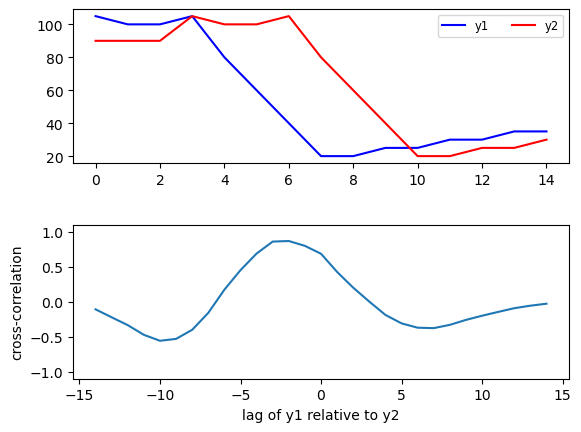

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {'Series1': [105, 100, 100, 105, 80, 60, 40, 20, 20 , 25, 25, 30, 30, 35, 35],
        'Series2': [90, 90, 90, 105, 100, 100, 105, 80, 60, 40, 20, 20 , 25, 25, 30]}

df_series1 = pd.DataFrame(data['Series1'])
df_series2 = pd.DataFrame(data['Series2'])

# Create DataFrame
df = pd.concat([df_series1,df_series2], ignore_index=True, axis=1)
npts = df_series1.size
#plt.plot(df_series1.index.values,df_series1.values.flatten(), 'b', label='y1')
#print(df_series1.index.values, type(df_series1.values.flatten()))


lags = np.arange(-npts + 1, npts)
ccov = np.correlate(df_series1.values.flatten() - df_series1.values.flatten().mean(), df_series2.values.flatten() - df_series2.values.flatten().mean(), mode='full')
ccor = ccov / (npts * df_series1.values.flatten().std() * df_series2.values.flatten().std())

fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=0.4)
ax = axs[0]
ax.plot(df_series1.index.values, df_series1.values.flatten(), 'b', label='y1')
ax.plot(df_series2.index.values, df_series2.values.flatten(), 'r', label='y2')
#ax.set_ylim(-10, 10)
ax.legend(loc='upper right', fontsize='small', ncol=2)

ax = axs[1]
ax.plot(lags, ccor)
ax.set_ylim(-1.1, 1.1)
ax.set_ylabel('cross-correlation')
ax.set_xlabel('lag of y1 relative to y2')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)

In [39]:
# cross correlation

from scipy import signal

def ccf_values(series1, series2):
    p = series1
    q = series2
    p = (p - np.mean(p)) / (np.std(p) * len(p))
    q = (q - np.mean(q)) / (np.std(q))  
    c = np.correlate(p, q, 'full')
    return c

#ccf_ielts = ccf_values(result_df_s, df_field_s)
ccf_ielts = ccf_values(df_series1.values.flatten(),df_series2.values.flatten())
ccf_ielts

array([-0.10895893, -0.22265433, -0.33483809, -0.47312282, -0.5579963 ,
       -0.53090774, -0.40092695, -0.1589841 ,  0.17214544,  0.45147615,
        0.68848097,  0.85917524,  0.86721716,  0.79806472,  0.68507475,
        0.42519379,  0.20028208,  0.00106822, -0.18867269, -0.30938209,
       -0.37123836, -0.37726476, -0.33048457, -0.25951817, -0.20024177,
       -0.14550028, -0.09247199, -0.05667638, -0.02833819])

In [40]:
# list of of our lag values
lags = signal.correlation_lags(len(df_series1),len(df_series2))
lags

array([-14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,
        -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14])

In [41]:
len(lags),len(ccf_ielts)

(29, 29)

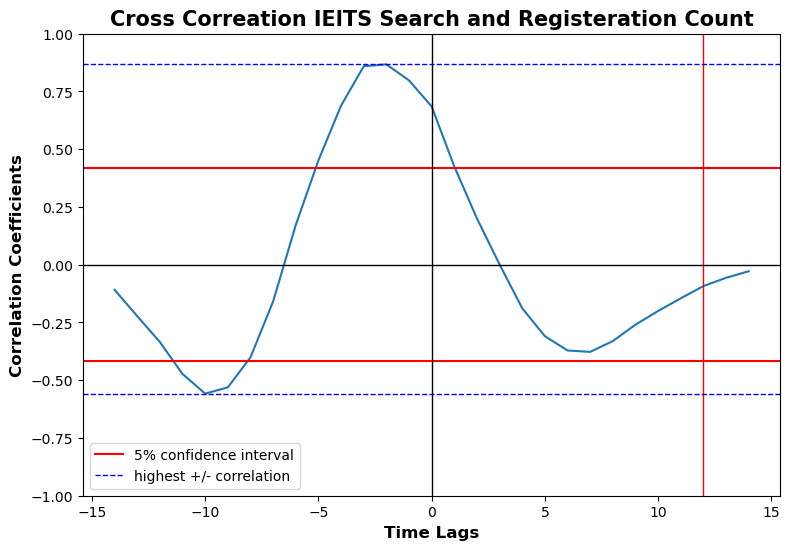

In [42]:
def ccf_plot(lags, ccf):
    fig, ax =plt.subplots(figsize=(9, 6))
    ax.plot(lags, ccf)
    ax.axhline(-2/np.sqrt(23), color='red', label='5% confidence interval')
    ax.axhline(2/np.sqrt(23), color='red')
    ax.axvline(x = np.argmax(ccf_ielts), color = 'red', lw = 1)
    ax.axvline(x = 0, color = 'black', lw = 1)
    ax.axhline(y = 0, color = 'black', lw = 1)
    ax.axhline(y = np.max(ccf), color = 'blue', lw = 1, linestyle='--', label = 'highest +/- correlation')
    ax.axhline(y = np.min(ccf), color = 'blue', lw = 1, linestyle='--')
    ax.set(ylim = [-1, 1])
    ax.set_title('Cross Correation IElTS Search and Registeration Count', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold', fontsize = 12)
    ax.set_xlabel('Time Lags', weight='bold', fontsize = 12)
    plt.legend()
    
#ccf_plot(lags[1620:1670], ccf_ielts[1620:1670])
ccf_plot(lags, ccf_ielts)

In [ ]:
# Sample data
data = {'Series1': [105, 100, 100, 105, 80, 60, 40, 20, 20 , 25, 25, 30, 30, 35, 35],
        'Series2': [90, 90, 90, 105, 100, 100, 105, 80, 60, 40, 20, 20 , 25, 25, 30]}


max correlation is at lag -2


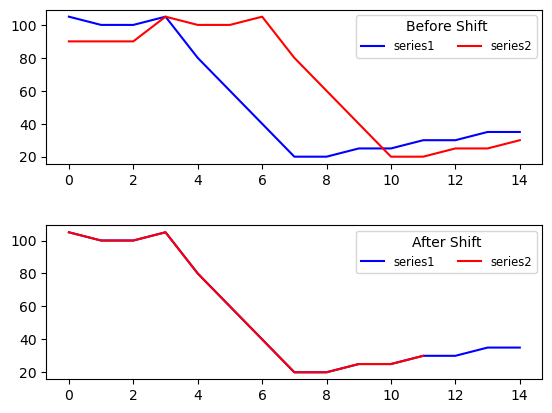

In [68]:
import pandas as pd
from scipy import signal


def synchronize_series(series1, series2,lag):
    """
    Synchronize two series using cross-correlation.
    
    Args:
    - series1: First pandas Series.
    - series2: Second pandas Series.
    
    Returns:
    - Synchronized series1 and series2.
    """

    
    # Shift one of the series by lag/lead value
    if lag< 0:
        series2_sync = series2.shift(lag-1)
        series1_sync = series1
    else:
        series1_sync = series1.shift(-lag)
        series2_sync = series2
    
    return series1_sync, series2_sync


# Synchronize Series1 and Series2
lag = lags[np.argmax(ccor)]
sync_series1, sync_series2 = synchronize_series(df_series1, df_series2, lag)

fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=0.4)
ax = axs[0]
ax.plot(df_series1.index, df_series1, 'b', label='series1')
ax.plot(df_series2.index, df_series2, 'r', label='series2')
ax.legend(title="Before Shift", loc='upper right', fontsize='small', ncol=2)

ax = axs[1]
ax.plot(sync_series1.index, sync_series1, 'b', label='series1')
ax.plot(sync_series2.index, sync_series2, 'r', label='series2')
ax.legend(title="After Shift", loc='upper right', fontsize='small', ncol=2)


maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)

# Print synchronized series
#print("Synchronized Series 1:", sync_series1)
#print("Synchronized Series 2:", sync_series2)